<div>
Olá, Heury!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Análises bem detalhadas em cada etapa do projeto
- Boas habilidades de manipulação de dados
    
<br>
Espero que as sugestões sejam relevantes para projetos futuros. Te desejo uma jornada de muito sucesso e aprendizado. 
        
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Sprint 11 - PROJETO INTEGRADO DE ANÁLISE DE DADOS

<div class="alert alert-block alert-info">
    <b>APRESENTAÇÃO</b><br>
Trata-se de uma startup que vende produtos alimentícios. <br>
Será necessário analisar o comportamento do usuário para o aplicativo da empresa.<br>
Para isso, estudaremos o funil de vendas. Descubremos como os usuários chegam à etapa de compra, procurando responder à seguintes dúvidas:<br>
- Usuários realmente chegam a essa etapa? 
- Quantos ficam presos nas fases anteriores? 
- Quais etapas em particular?

Em seguida, verificaremos os resultados do teste A e A/B, pois os designers gostariam de alterar as fontes de todo o aplicativo, mas os gerentes temem que os usuários achem o novo design intimidador. Eles decidirão tomar a decisão com base nos resultados de um teste A e A/B.<br>
Os usuários são divididos em três grupos:<br>
Dois grupos de controle recebem as fontes antigas e um grupo de teste recebe as novas. Precisaremos descubrir qual é o conjunto de fontes que produz melhores resultados.<br>
A criação de dois grupos A tem certas vantagens. 
Podemos adaptar um princípio segundo o qual só estaremos confiantes na precisão de nossos testes quando os dois grupos de controle forem semelhantes.<br>
e houver diferenças significativas entre os grupos A, isso pode nos ajudar a descobrir fatores que podem distorcer os resultados. A comparação de grupos de controle também nos informa de quanto tempo e dados precisaremos ao executar outros testes.<br>
Utilizaremos o mesmo conjunto de dados para análise geral e análise A e A/B. 
</div>


# 1 - Carregamento e Preparação dos Dados

In [48]:
#Carregando as bibliotecas necessárias

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st 
from statsmodels.stats.proportion import proportions_ztest

In [49]:
#Carregando o dataset e verificando os dados

df = pd.read_csv('/datasets/logs_exp_us.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


<div class="alert alert-block alert-info">
Parece que o arquivo foi carregado com todas as colunas como uma única string separada por tabulação (\t), o que indica que o separador correto é \t (tab). Vamos carregar novamente os dados </div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Aqui você poderia carregar os dados diretamente com o separador especificado.
</div>

In [50]:
#Carregando o dataset novamente
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')


#Renomeando as colunas para nomes mais adequados
df.rename(columns={
    "EventName": "event_name",
    "DeviceIDHash": "user_id",
    "EventTimestamp": "event_timestamp",
    "ExpId": "experiment_id"
}, inplace=True)


#Convertendo timestamp para datetime e extraindo a data
df["event_timestamp"] = pd.to_datetime(df["event_timestamp"], unit='s') # Corrigindo a conversão de timestamp de Unix epoch para datetime

df["event_date"] = df["event_timestamp"].dt.date

#Verificando valores ausentes e os tipos de dados
missing_values = df.isnull().sum()
data_types = df.dtypes

#Criando uma amostra e verificando os dados
df_sample = df.head()
missing_values, data_types, df_sample

(event_name         0
 user_id            0
 event_timestamp    0
 experiment_id      0
 event_date         0
 dtype: int64,
 event_name                 object
 user_id                     int64
 event_timestamp    datetime64[ns]
 experiment_id               int64
 event_date                 object
 dtype: object,
                 event_name              user_id     event_timestamp  \
 0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
 1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
 2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
 3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
 4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
 
    experiment_id  event_date  
 0            246  2019-07-25  
 1            246  2019-07-25  
 2            248  2019-07-25  
 3            248  2019-07-25  
 4            248  2019-07-25  )

<div class="alert alert-block alert-info">
O arquivo de dados estava separado por tabulação (\t).<br>
As colunas foram renomeadas adequadamente.<br>
A coluna event_timestamp foi convertida para data e criamos uma nova coluna chamada event_date apenas com a data.<br> 
Nenhum valor ausente foi encontrado nas colunas.</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente usando o separador `\t`
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- Os nomes das colunas foram convertidos para seguir o padrão `snake_case`
- A hora foi extraída a partir do timestamp
- **Dica**: Evite implementar várias linhas de código/comandos na mesma célula do notebook. Procure, sempre que possível, isolar a execução do código.
</div>

# 2 - Estudo e Verificação dos Dados

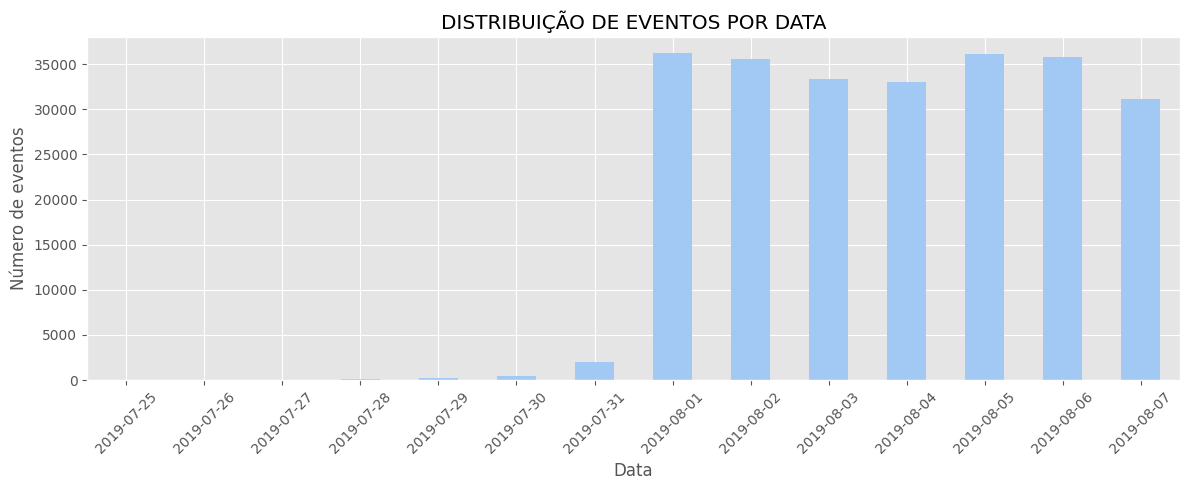

O total de eventos registrados é: 244126
O total de usuários registrados é: 7551
O número médio de eventos por usuários é: 32.33

Período coberto nos dados:
A data mínima é: 2019-07-25
A data máxima é: 2019-08-07


In [51]:
#Definindo o padrão dos gráficos
plt.style.use("ggplot")
sns.set_palette("pastel")

# Verificando a quantidade total de eventos
total_events = len(df)

# Verificando a quantidade de usuários únicos
unique_users = df["user_id"].nunique()

# Verificando o número médio de eventos por usuário
avg_events_per_user = total_events / unique_users

# Verificando as datas mínima e máxima
min_date = df["event_date"].min()
max_date = df["event_date"].max()

# Armazenando dados para criar um histograma de eventos por data
events_per_day = df["event_date"].value_counts().sort_index()

# Gerando o histograma
plt.figure(figsize=(12, 5))
events_per_day.plot(kind='bar')
plt.title("DISTRIBUIÇÃO DE EVENTOS POR DATA")
plt.xlabel("Data")
plt.ylabel("Número de eventos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Exibindo os dados básicos
print(f'O total de eventos registrados é: {total_events}')
print(f'O total de usuários registrados é: {unique_users}')
print(f'O número médio de eventos por usuários é: {avg_events_per_user:.2f}')
print()
print('\033[1mPeríodo coberto nos dados:\033[0m')
print(f'A data mínima é: {min_date}')
print(f'A data máxima é: {max_date}')


<div class="alert alert-block alert-info">
O histograma mostra claramente que os primeiros dias (25 a 31 de julho) possuem menos eventos, indicando que os dados ainda não estavam completamente registrados nesses dias iniciais.<br>
A partir de 01/08/2019, o volume de eventos aumenta e se mantém estável, sugerindo que os dados passam a ser confiáveis a partir desse ponto.<br>
<b>Nesse caso iremos:</b> <br>
1 - Filtrar os dados para manter apenas os dias completos (a partir de 01/08/2019)<br>
2 - Verificar quantos eventos e usuários foram perdidos com essa exclusão<br>
3 - Garantir que temos usuários dos três grupos experimentais (controle A1, controle A2 e teste B)</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O total de eventos no período e média de eventos por usuário foram calculados
- O período de cobertura dos dados foi analisado. Como sugestão, aqui você poderia calcular também o intervalo entre as datas
- A distribuição dos eventos foi analisada ao longo dos dias
- A conclusão foi apresentada
</div>

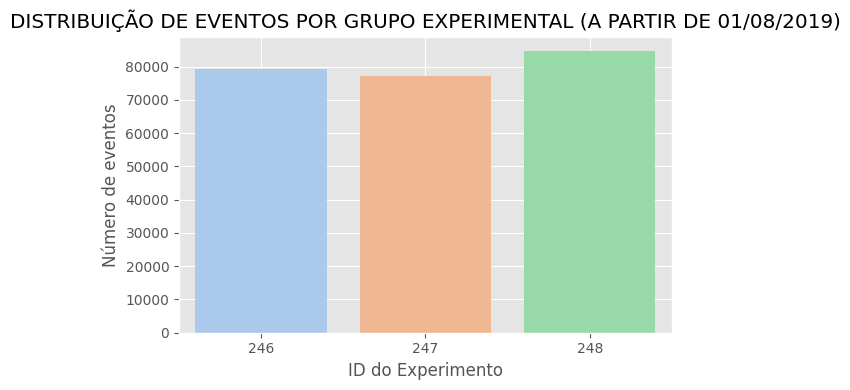

O número de eventos perdidos foi de: 2828 de um total de 244.126
O número de usuários perdidos foi de: 17 de um total de 7.551

Os grupos de Controle são:
Controle A1 (ID 246): 79425 eventos
Controle A2 (ID 247): 77147 eventos
Teste B (ID 248): 84726 eventos


In [52]:
# Filtrando os dados a partir de 01/08/2019
filtered = pd.to_datetime("2019-08-01").date()
df_filtered_aug = df[df["event_date"] >= filtered]

# Verificando as perda de eventos e usuários
lost_events_aug = total_events - len(df_filtered_aug)
lost_users_aug = unique_users - df_filtered_aug["user_id"].nunique()

# Verificando a presença dos grupos experimentais
group_counts_aug = df_filtered_aug["experiment_id"].value_counts().sort_index()

# Visualizando a distribuição dos grupos experimentais
plt.figure(figsize=(6, 4))
sns.barplot(x=group_counts_aug.index.astype(str), y=group_counts_aug.values)
plt.title("DISTRIBUIÇÃO DE EVENTOS POR GRUPO EXPERIMENTAL (A PARTIR DE 01/08/2019)")
plt.xlabel("ID do Experimento")
plt.ylabel("Número de eventos")
plt.tight_layout()
plt.grid(True)
plt.show()

print(f'O número de eventos perdidos foi de: {lost_events_aug} de um total de 244.126')
print(f'O número de usuários perdidos foi de: {lost_users_aug} de um total de 7.551')
print()
print('\033[1mOs grupos de Controle são:\033[0m')

for group_id, count in group_counts_aug.items():
    label = "Controle A1" if group_id == 246 else "Controle A2" if group_id == 247 else "Teste B"
    print(f"{label} (ID {group_id}): {count} eventos")

<div class="alert alert-block alert-info">
As perdas são pequenas, então os dados permanecem representativos.<br>
E temos eventos suficientes de todos os três grupos experimentais após o corte.</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Aqui você poderia ter calculado o percentual de eventos perdidos após o filtro.
</div>

# 3 - Estudo do Funil de Eventos

In [53]:
# Verificando quais eventos existem e sua frequência de ocorrência
event_counts = df_filtered_aug["event_name"].value_counts()

# Verificando o número de usuários únicos que executaram cada evento
users_per_event = df_filtered_aug.groupby("event_name")["user_id"].nunique().sort_values(ascending=False)

# Verificando a proporção de usuários por evento em relação ao total de usuários
total_users_aug = df_filtered_aug["user_id"].nunique()
user_ratio_per_event = (users_per_event / total_users_aug).sort_values(ascending=False)

# Juntando tudo em um dataframe para análise
event_funnel_df = pd.DataFrame({
    "event_count": event_counts,
    "unique_users": users_per_event,
    "user_ratio": user_ratio_per_event
})

# exibindo os nomes dos eventos para que possamos decidir a ordem lógica do funil
pd.set_option('display.float_format', '{:.2%}'.format)
display(event_funnel_df)

,event_count,unique_users,user_ratio
MainScreenAppear,117431,7419,98.47%
OffersScreenAppear,46350,4593,60.96%
CartScreenAppear,42365,3734,49.56%
PaymentScreenSuccessful,34113,3539,46.97%
Tutorial,1039,840,11.15%


<div class="alert alert-block alert-info">
A tabela exibida mostra:<br>
A frequência de cada evento no app.<br>
O número de usuários únicos que realizaram cada ação.<br>
A proporção de usuários que executaram a ação pelo menos uma vez.<br><br>
    <b>Os eventos encontrados em ordem de frequência são:</b><br>
MainScreenAppear<br>
OffersScreenAppear<br>
CartScreenAppear<br>
PaymentScreenSuccessful<br>
Tutorial<br>
<br>
Com base nesses nomes, a sequência mais lógica do funil de vendas seria:<br>
MainScreenAppear → OffersScreenAppear → CartScreenAppear → PaymentScreenSuccessful<br><br>
O evento Tutorial parece estar fora do fluxo principal de compra, então não será incluído no cálculo do funil.
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A proporção de usuários por etapa do funil foi analisada
- A ordem das etapas foi calculada!
</div>

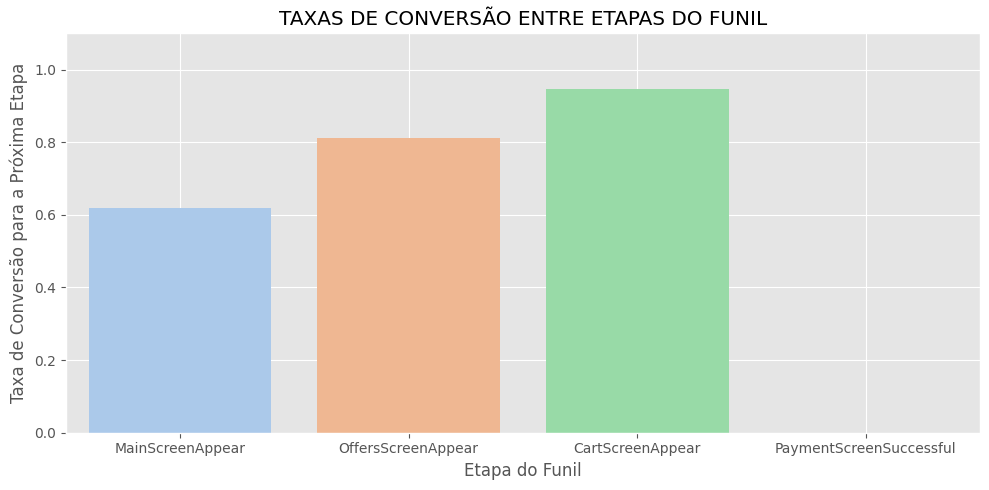

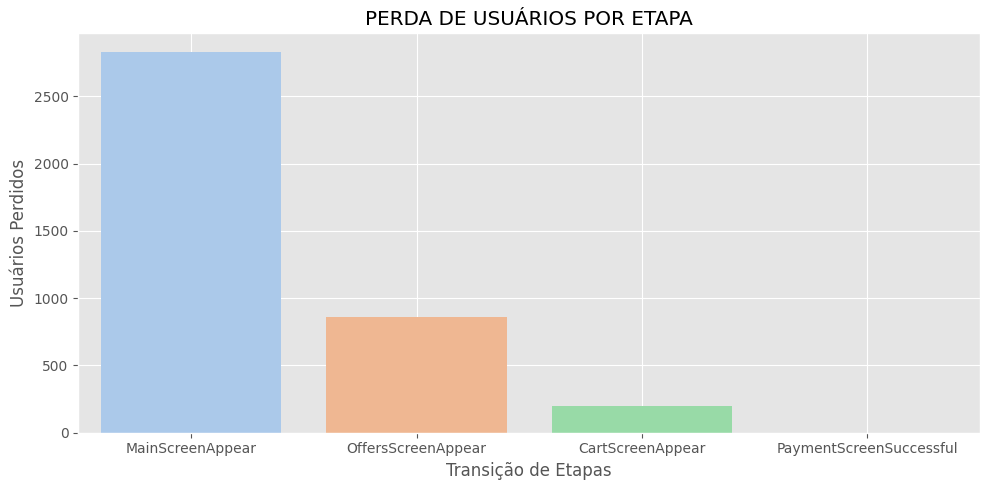

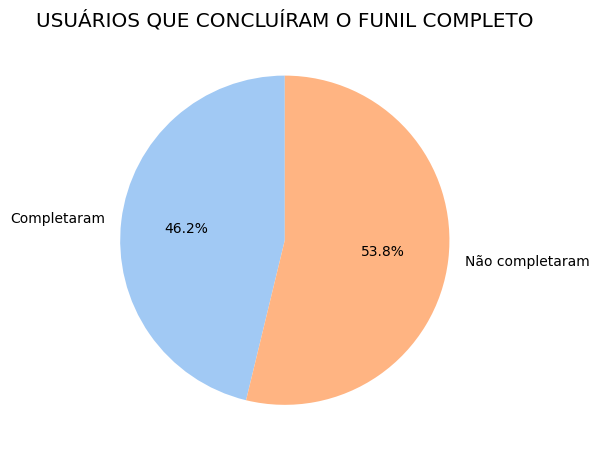

In [54]:
# Definindo a ordem do funil de eventos
funnel_steps = [
    "MainScreenAppear",
    "OffersScreenAppear",
    "CartScreenAppear",
    "PaymentScreenSuccessful"
]

# Calculando os usuários únicos por etapa
funnel_data = {}
for step in funnel_steps:
    funnel_data[step] = df_filtered_aug[df_filtered_aug["event_name"] == step]["user_id"].nunique()

# Criando um dataframe com as etapas do funil
funnel_df = pd.DataFrame.from_dict(funnel_data, orient='index', columns=["unique_users"])
funnel_df["step"] = funnel_df.index
funnel_df.reset_index(drop=True, inplace=True)

# Calculando as taxas de conversão entre etapas
funnel_df["conversion_to_next"] = funnel_df["unique_users"].shift(-1) / funnel_df["unique_users"]

# Calculando a conversão total (do início ao pagamento)
funnel_df["overall_conversion"] = funnel_df["unique_users"].iloc[-1] / funnel_df["unique_users"].iloc[0]

# Identificando a etapa com maior perda de usuários
funnel_df["dropoff"] = funnel_df["unique_users"] - funnel_df["unique_users"].shift(-1)

# Quantos usuários fizeram o caminho completo (todos os 4 eventos)?
# Interseção entre usuários que fizeram todas as etapas
users_complete_path = set(df_filtered_aug[df_filtered_aug["event_name"] == funnel_steps[0]]["user_id"])
for step in funnel_steps[1:]:
    users_complete_path = users_complete_path & set(df_filtered_aug[df_filtered_aug["event_name"] == step]["user_id"])
users_who_completed = len(users_complete_path)

# Criando e exibindo o Gráfico 1: Taxas de conversão entre etapas
plt.figure(figsize=(10, 5))
sns.barplot(x=funnel_df["step"], y=funnel_df["conversion_to_next"])
plt.ylim(0, 1.1)
plt.title("TAXAS DE CONVERSÃO ENTRE ETAPAS DO FUNIL")
plt.ylabel("Taxa de Conversão para a Próxima Etapa")
plt.xlabel("Etapa do Funil")
plt.grid(True)
plt.tight_layout()
plt.show()

# Criando e exibindo o Gráfico 2: Etapa com maior perda de usuários
plt.figure(figsize=(10, 5))
sns.barplot(x=funnel_df["step"], y=funnel_df["dropoff"])
plt.title("PERDA DE USUÁRIOS POR ETAPA")
plt.ylabel("Usuários Perdidos")
plt.xlabel("Transição de Etapas")
plt.grid(True)
plt.tight_layout()
plt.show()


#Criando e exibindo o Gráfico 3: Usuários que completaram o funil vs. total de usuários da primeira etapa
completed = users_who_completed
not_completed = funnel_df["unique_users"].iloc[0] - users_who_completed

plt.figure(figsize=(6, 6))
plt.pie([completed, not_completed], labels=["Completaram", "Não completaram"], autopct='%1.1f%%', startangle=90)
plt.title("USUÁRIOS QUE CONCLUÍRAM O FUNIL COMPLETO")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
Podemos verificar que a fase com maior perda de usuários é a "De MainScreenAppear" para "OffersScreenAppear" (entrada para a tela de ofertas). Foram 2.826 usuários perdidos. Depois disso, a retenção melhora significativamente.<br>
<br>
O número de usuários que completaram todas as etapas é de 3.429 usuários<br>
Isso representa cerca de 46% de todos os usuários do funil, um valor consistente com a conversão geral observada anteriormente.
    </div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O percentual de usuários que percorrem todo o caminho foi calculado
- A perda de usuários foi calculada por etapa do funil
- O número de usuários por grupo foi analisado
</div>

# 4 - Estudando os Resultados do Experimento

In [55]:
# Verificando o número de usuários únicos em cada grupo experimental
users_per_group = df_filtered_aug.groupby("experiment_id")["user_id"].nunique()

# Criando uma função de teste de hipótese entre dois grupos para um evento específico
def test_proportions(event_name, group1_id, group2_id):
    group1_users = df_filtered_aug[df_filtered_aug["experiment_id"] == group1_id]
    group2_users = df_filtered_aug[df_filtered_aug["experiment_id"] == group2_id]

    total_users1 = group1_users["user_id"].nunique()
    total_users2 = group2_users["user_id"].nunique()

    event_users1 = group1_users[group1_users["event_name"] == event_name]["user_id"].nunique()
    event_users2 = group2_users[group2_users["event_name"] == event_name]["user_id"].nunique()

    count = [event_users1, event_users2]
    nobs = [total_users1, total_users2]

    stat, pval = proportions_ztest(count, nobs)
    return {
        "event": event_name,
        "group1": group1_id,
        "group2": group2_id,
        "prop1": event_users1 / total_users1,
        "prop2": event_users2 / total_users2,
        "p_value": pval
    }

# Executando o teste A/A (grupo 246 vs 247) para todos os eventos
event_names = df_filtered_aug["event_name"].unique().tolist()
aa_test_results = [test_proportions(event, 246, 247) for event in event_names]

# Convertendo os resultados em DataFrame
aa_test_df = pd.DataFrame(aa_test_results)

users_per_group

experiment_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

<div class="alert alert-block alert-info"><b>O estudo dos grupos A/A (controle), apresentou o seguinte:</b><br>
Grupo 246 (Controle A1): 2.484 usuários<br>
Grupo 247 (Controle A2): 2.513 usuários<br>
Grupo 248 (Teste B): 2.537 usuários<br></div>

In [56]:
aa_test_df

,event,group1,group2,prop1,prop2,p_value
0,Tutorial,246,247,11.19%,11.26%,93.77%
1,MainScreenAppear,246,247,98.63%,98.53%,75.71%
2,OffersScreenAppear,246,247,62.08%,60.49%,24.81%
3,CartScreenAppear,246,247,50.97%,49.26%,22.88%
4,PaymentScreenSuccessful,246,247,48.31%,46.08%,11.46%


<div class="alert alert-block alert-info">
Nenhuma das diferenças entre os grupos 246 e 247 é estatisticamente significativa.<br>
Isso confirma que a aleatorização funcionou corretamente, e que podemos confiar na base para o teste A/B.

In [57]:
# Criando uma função para comparar grupo de teste (248) com qualquer outro grupo
def compare_with_test(event_name, control_id, test_id=248):
    control_users = df_filtered_aug[df_filtered_aug["experiment_id"] == control_id]
    test_users = df_filtered_aug[df_filtered_aug["experiment_id"] == test_id]

    total_control = control_users["user_id"].nunique()
    total_test = test_users["user_id"].nunique()

    control_event = control_users[control_users["event_name"] == event_name]["user_id"].nunique()
    test_event = test_users[test_users["event_name"] == event_name]["user_id"].nunique()

    count = [control_event, test_event]
    nobs = [total_control, total_test]

    stat, pval = proportions_ztest(count, nobs)
    return {
        "event": event_name,
        "control_group": control_id,
        "test_group": test_id,
        "control_prop": control_event / total_control,
        "test_prop": test_event / total_test,
        "p_value": pval
    }

# Comparando grupo 248 com 246 e 247 separadamente
ab_test_246 = [compare_with_test(event, 246) for event in event_names]
ab_test_247 = [compare_with_test(event, 247) for event in event_names]

# Comparando grupo 248 com grupos 246 + 247 combinados
combined_control = df_filtered_aug[df_filtered_aug["experiment_id"].isin([246, 247])]
test_group = df_filtered_aug[df_filtered_aug["experiment_id"] == 248]

def compare_with_combined(event_name):
    total_control = combined_control["user_id"].nunique()
    total_test = test_group["user_id"].nunique()

    control_event = combined_control[combined_control["event_name"] == event_name]["user_id"].nunique()
    test_event = test_group[test_group["event_name"] == event_name]["user_id"].nunique()

    count = [control_event, test_event]
    nobs = [total_control, total_test]

    stat, pval = proportions_ztest(count, nobs)
    return {
        "event": event_name,
        "control_group": "246+247",
        "test_group": 248,
        "control_prop": control_event / total_control,
        "test_prop": test_event / total_test,
        "p_value": pval
    }

ab_test_combined = [compare_with_combined(event) for event in event_names]

# Juntando todos os resultados em DataFrame
ab_df_246 = pd.DataFrame(ab_test_246)
ab_df_247 = pd.DataFrame(ab_test_247)
ab_df_combined = pd.DataFrame(ab_test_combined)

ab_df_all = pd.concat([ab_df_246, ab_df_247, ab_df_combined], ignore_index=True)
ab_df_all

,event,control_group,test_group,control_prop,test_prop,p_value
0,Tutorial,246,248,11.19%,11.00%,82.64%
1,MainScreenAppear,246,248,98.63%,98.27%,29.50%
2,OffersScreenAppear,246,248,62.08%,60.35%,20.84%
3,CartScreenAppear,246,248,50.97%,48.48%,7.84%
4,PaymentScreenSuccessful,246,248,48.31%,46.55%,21.23%
5,Tutorial,247,248,11.26%,11.00%,76.53%
6,MainScreenAppear,247,248,98.53%,98.27%,45.87%
7,OffersScreenAppear,247,248,60.49%,60.35%,91.98%
8,CartScreenAppear,247,248,49.26%,48.48%,57.86%
9,PaymentScreenSuccessful,247,248,46.08%,46.55%,73.73%


<div class="alert alert-block alert-info">
Nenhum evento apresentou diferença estatisticamente significativa entre o grupo de teste (fonte nova) e os grupos de controle.<br>
A fonte nova não impactou negativamente a navegação ou a conversão.<br>
A ação CartScreenAppear no grupo 246 teve o p-valor mais baixo (0.078), mas ainda acima do limiar padrão de significância.<br>
<br></div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O teste foi executado corretamente
- As estatísticas e `p-valor` foram calculados
- As conclusões foram apresentadas
</div>

# 5 - CONCLUSÕES

<div class="alert alert-block alert-info">Usamos em nossos testes o nível de significância de 0,05, ou seja, aceitamos até 5% de chance de cometer um erro tipo I (rejeitar uma hipótese nula que é verdadeira).<br><br>
Para cada evento, foram feitas as seguintes comparações:
Grupo 246 vs 247 → (A/A)<br>
Grupo 246 vs 248 → (A/B)<br>
Grupo 247 vs 248 → (A/B)<br>
Grupo 246+247 vs 248 → (A/B)<br>
Como temos 5 eventos, o total de testes é:<br>
5 eventos × 4 comparações = 20 testes de hipótese.<br><br>

Nenhum evento apresentou diferença estatisticamente significativa entre o grupo de teste (fonte nova) e os grupos de controle.<br>
Com base nesses resultados, não há evidências de que a nova fonte prejudique o comportamento dos usuários. <br>
    Portanto, a mudança de design pode ser considerada segura.
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A conclusão final foi apresentada. Bom trabalho consolidando as análises realizadas!
</div>